## Question 1

<p><b>SVM </b> (Ex 5.5 Mohri)</p>
<p>Please use the associated Satimage training and testing datasets for this problem.</p>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.model_selection import KFold,train_test_split
import csv
from sklearn.preprocessing import normalize
import os
import warnings
warnings.simplefilter('ignore')

## Part a

<p>Normalize the data. Please note we have already split the data into training and testing
vectors for you.</p>

In [31]:
filepath = 'satimage.scale.t'
all_lines = []
testing_function = []
flag=True
with open(filepath) as fp:
    line1= fp.readline()
    cnt = 1
    while line1:
        all_lines.append(line1)
        if flag:
            flag=False
            testing_function.append(line1)
        line1 = fp.readline()

In [32]:
column_names = []
for i in range(1,37):
    column_names.append(str(i))

column_names.append("label")

def generate_csv(all_lines):
    
    with open('hw2_q1_test.csv', mode='w') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=column_names)
        writer.writeheader()
                
        for i in all_lines:
            temp_dict = {}
            data = i[2:].split()

            for j in data:
                label,value = j.split(":")
                temp_dict[label]=float(value)
            
            temp_dict["label"] = int(i[0])
            writer.writerow(temp_dict)
            

        
generate_csv(all_lines)

In [33]:
train_data = pd.read_csv("hw2_q1_test.csv")
train_data =train_data.fillna(train_data.mean())
train_data.to_csv("hw2_q1_test_cleaned.csv",index=False)

In [34]:
def return_x_y_from_file(file_address):
    train_data = pd.read_csv(file_address)
    X = train_data.iloc[:,:-1]
#     column_names= X.columns
    Y = train_data.iloc[:,-1]
    Y=pd.DataFrame(Y)
    
    return X,Y

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import sys


def cross_validate_single_kernel(X, y, kernel, n_folds, args):
    
    
    score_dict = {}
    roc_auc_dict ={}
    all_roc_dict ={}
    support_v = {}
    
    for c in args["c_vals"]:    
        print("c_val = ",c)
        score=0
        roc_score =0
        a = []
        skf=StratifiedKFold(n_splits=n_folds, shuffle=True)    
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
            
            svm = SVC(C=c, kernel=kernel, gamma="auto",degree = args["d_val"])
            svm.fit(X_train, y_train)
            
            y_pred = svm.predict(X_test)
            
            score += svm.score(X_test,y_test) / n_folds
            
            a.append(roc_auc_score(y_test, y_pred))
            roc_score += roc_auc_score(y_test, y_pred)/n_folds 
            
        score_dict[c]=score
        roc_auc_dict[c]=roc_score
        all_roc_dict[c]=a
        
         
    
    return score_dict,roc_auc_dict,all_roc_dict


In [54]:
X,Y = return_x_y_from_file("hw2_q1_test_cleaned.csv")


for i in range(len(Y["label"])):
    if Y["label"][i]==6:
        Y["label"][i]=1
    else:
        Y["label"][i]=-1

#Normalizing the Data
X = pd.DataFrame(normalize(X))

## Part b
<p>(Hyperparameter Tuning) Consider the binary classification that consists of distinguishing
class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to
solve this classification problem. For each value of the polynomial degree, d = 1, 2, 3, 4,
plot the average 10-fold cross-validation error plus or minus one standard deviation as a
function of C (let the other parameters of the polynomial kernels be equal to their default
values) ON THE TRAINING DATA. Report the best value of the trade-off constant
C measured on the training internal cross-validation.</p>


In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np

def plot_roc(c_vals, c_auc_dict,all_roc):
    
    sd_dict ={}
    
    lower = {}
    upper ={}
    
#     print(all_roc[0])
    for i in c_vals:        
        sd = np.std(all_roc[i])
        sd_dict[i] = sd
        lower[i] = c_auc_dict[i] - sd
        upper[i] = c_auc_dict[i] + sd
    
    print("SD for c",sd_dict)
    print("\n\nAccuracy - SD",lower)
    print("\n\nAccuracy + SD",upper)

    
    plt.figure(figsize = (16,10)) 
    plt.bar(range(len(c_vals)), [c_auc_dict[c_val] for c_val in c_vals],color='green',align='center')
                                 
    plt.title('SVM ROC for Penalty Parameter C with SD')
    plt.xlabel('C')
    plt.ylim(0.3, 1)
    plt.ylabel('ROC')
    plt.xticks(range(len(c_vals)), c_vals, rotation='vertical')
    plt.show()
    
    

In [38]:
n_folds =10
c_vals = np.power(float(10), range(-5, 5 + 1))
d_vals     = range( 1,4 + 1)


d = 1
c_val =  1e-05
c_val =  0.0001
c_val =  0.001
c_val =  0.01
c_val =  0.1
c_val =  1.0
c_val =  10.0
c_val =  100.0
c_val =  1000.0
c_val =  10000.0
c_val =  100000.0
SD for c {1e-05: 0.0, 0.0001: 0.0, 0.001: 0.0, 0.01: 0.0, 0.1: 0.0, 1.0: 0.023523020751199455, 10.0: 0.0324729765187813, 100.0: 0.03227999521774064, 1000.0: 0.0316444607774308, 10000.0: 0.030096575298179593, 100000.0: 0.025369209646807247}


Accuracy - SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.8422258319813828, 10.0: 0.8434622202549636, 100.0: 0.8401230085369528, 1000.0: 0.8362529109372125, 10000.0: 0.8328084448659144, 100000.0: 0.8485009057752482}


Accuracy + SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.8892718734837818, 10.0: 0.9084081732925263, 100.0: 0.904682998972434, 1000.0: 0.8995418324920741, 10000.0:

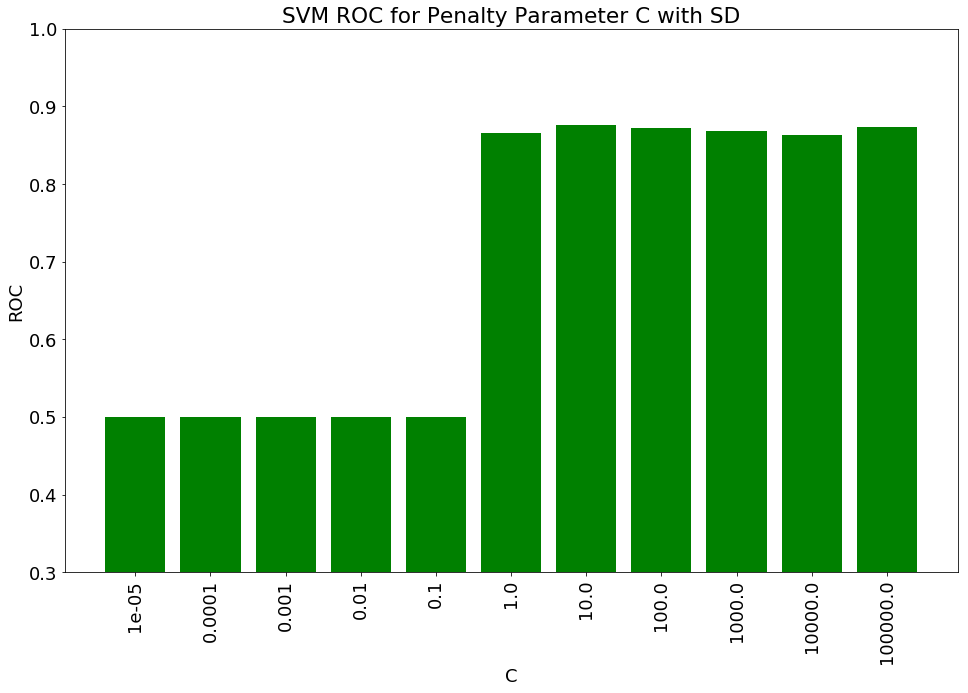

d = 2
c_val =  1e-05
c_val =  0.0001
c_val =  0.001
c_val =  0.01
c_val =  0.1
c_val =  1.0
c_val =  10.0
c_val =  100.0
c_val =  1000.0
c_val =  10000.0
c_val =  100000.0
SD for c {1e-05: 0.0, 0.0001: 0.0, 0.001: 0.0, 0.01: 0.0, 0.1: 0.0, 1.0: 0.0, 10.0: 0.0063829787234042645, 100.0: 0.03945761188113699, 1000.0: 0.023096153018625023, 10000.0: 0.02313880031204788, 100000.0: 0.0313454305481333}


Accuracy - SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.49574468085106377, 100.0: 0.8300042154029682, 1000.0: 0.8641100769911093, 10000.0: 0.8680654828196445, 100000.0: 0.8584751785465684}


Accuracy + SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.5085106382978724, 100.0: 0.9089194391652421, 1000.0: 0.9103023830283593, 10000.0: 0.91434308

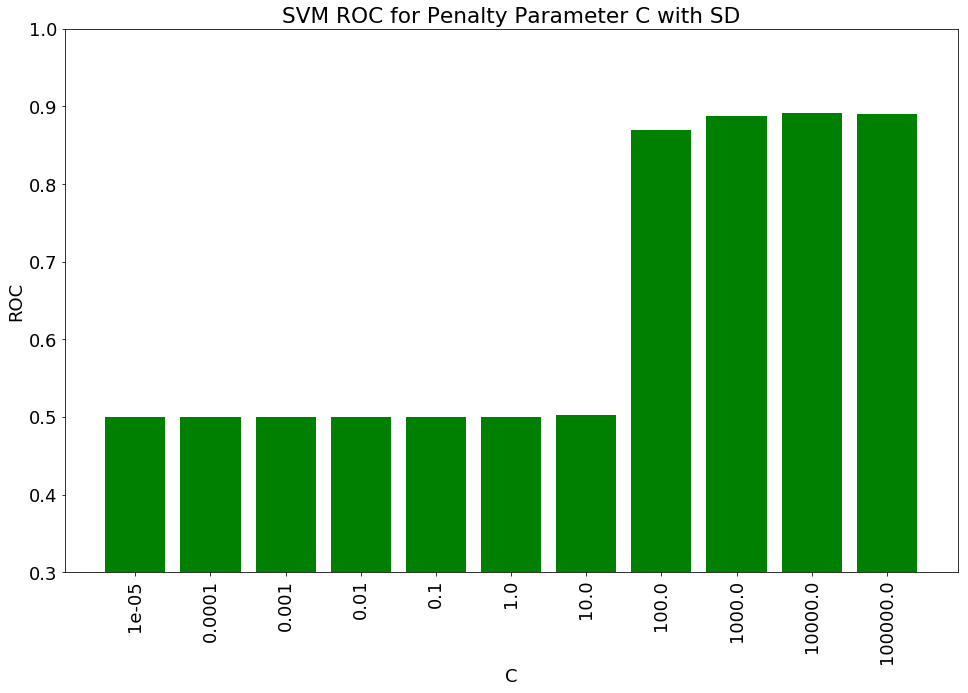

d = 3
c_val =  1e-05
c_val =  0.0001
c_val =  0.001
c_val =  0.01
c_val =  0.1
c_val =  1.0
c_val =  10.0
c_val =  100.0
c_val =  1000.0
c_val =  10000.0
c_val =  100000.0
SD for c {1e-05: 0.0, 0.0001: 0.0, 0.001: 0.0, 0.01: 0.0, 0.1: 0.0, 1.0: 0.0, 10.0: 0.0, 100.0: 0.0, 1000.0: 0.032223461045505906, 10000.0: 0.03657133725969333, 100000.0: 0.027384553755772964}


Accuracy - SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.49999999999999994, 100.0: 0.49999999999999994, 1000.0: 0.8279003047728781, 10000.0: 0.8386754990634885, 100000.0: 0.8649600436576605}


Accuracy + SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.49999999999999994, 100.0: 0.49999999999999994, 1000.0: 0.8923472268638899, 10000.0: 0.9118181735828751, 100000.0: 0.9197291

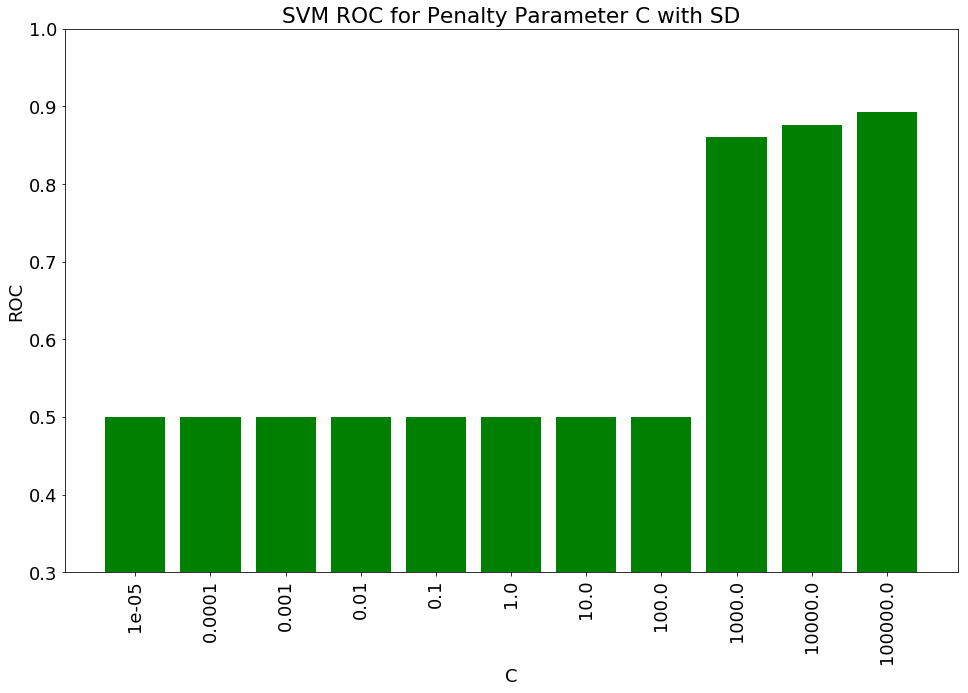

d = 4
c_val =  1e-05
c_val =  0.0001
c_val =  0.001
c_val =  0.01
c_val =  0.1
c_val =  1.0
c_val =  10.0
c_val =  100.0
c_val =  1000.0
c_val =  10000.0
c_val =  100000.0
SD for c {1e-05: 0.0, 0.0001: 0.0, 0.001: 0.0, 0.01: 0.0, 0.1: 0.0, 1.0: 0.0, 10.0: 0.0, 100.0: 0.0, 1000.0: 0.0, 10000.0: 0.014113296980235737, 100000.0: 0.03330016107310417}


Accuracy - SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.49999999999999994, 100.0: 0.49999999999999994, 1000.0: 0.49999999999999994, 10000.0: 0.4986526604665728, 100000.0: 0.8295005620530257}


Accuracy + SD {1e-05: 0.49999999999999994, 0.0001: 0.49999999999999994, 0.001: 0.49999999999999994, 0.01: 0.49999999999999994, 0.1: 0.49999999999999994, 1.0: 0.49999999999999994, 10.0: 0.49999999999999994, 100.0: 0.49999999999999994, 1000.0: 0.49999999999999994, 10000.0: 0.5268792544270443, 100000.0: 0.8961008841992341}


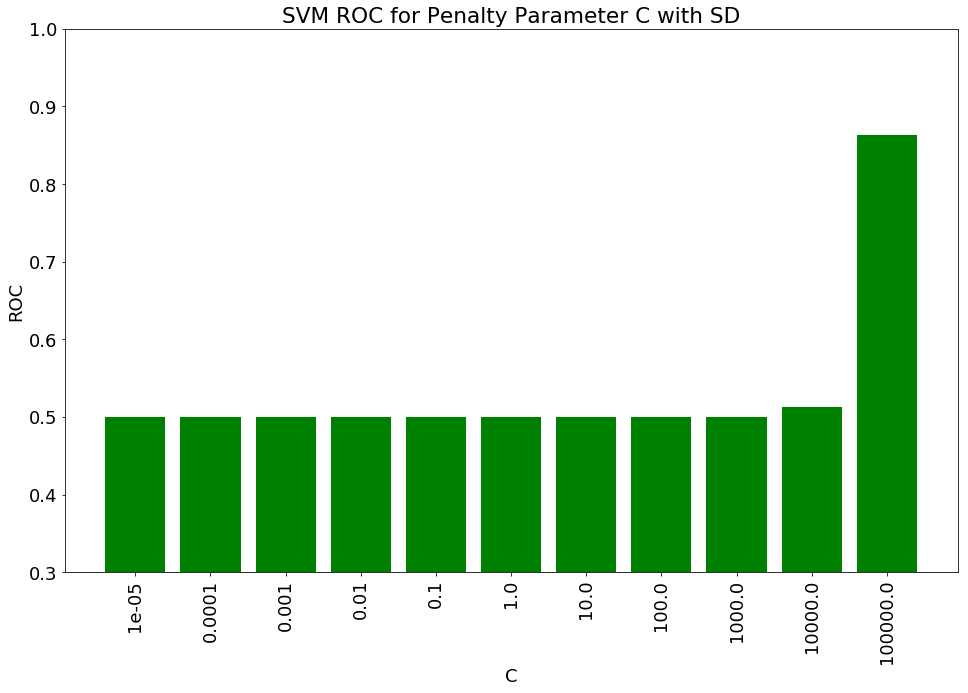

In [39]:

best_c_d={}
for i in d_vals:
    
    print("d =",i)
    
    score_dict,roc_auc_dict,all_roc_dict=cross_validate_single_kernel(X, Y, "poly", n_folds, {"c_vals":c_vals,"d_val":i})

    best_score_c = max(score_dict, key=score_dict.get)

    best_auc_c = max(roc_auc_dict, key=roc_auc_dict.get)

    best_c_d[i] = best_auc_c
    

    plot_roc(c_vals,roc_auc_dict,all_roc_dict)
    
    

In [40]:
test_X,test_Y = return_x_y_from_file("hw2_q1_test_cleaned.csv")

for i in range(len(test_Y["label"])):
    if test_Y["label"][i]==6:
        test_Y["label"][i]=1
    else:
        test_Y["label"][i]=-1


In [48]:
test_X = (normalize(test_X))

## Part c
<p>(Model Training and Testing) Let (C
∗
, d∗
) be the best pair found previously in the 10-fold
internal cross validation. Build a model for each pair on the full training data. Then plot
the test errors for each model, as a function of d.</p>

In [52]:
roc_auc_score_d ={}
dist = {}
support_vedctors_d ={}
print(len(best_c_d))
for i in range(1,len(best_c_d)+1):
    c = best_c_d[i]
    print(c)
    svm = SVC(C=c, kernel="poly", tol=1e-7, shrinking=False, gamma="auto",degree = i)
    svm.fit(X, Y)
    
    n_support_vectors = len(svm.support_vectors_)
    pred_y=svm.predict(test_X)
    
    support_vectors = svm.support_vectors_
    
    dist[i]=svm.decision_function(support_vectors)
    roc_score = roc_auc_score(test_Y, pred_y)
    
    roc_auc_score_d[i]=roc_score
    support_vedctors_d[i]=n_support_vectors
    

4
10.0
10000.0
100000.0
100000.0


Roc Score for different values of d
{1: 0.8810874704491725, 2: 0.9196704213600335, 3: 0.9220414406897511, 4: 0.8680364344319288}


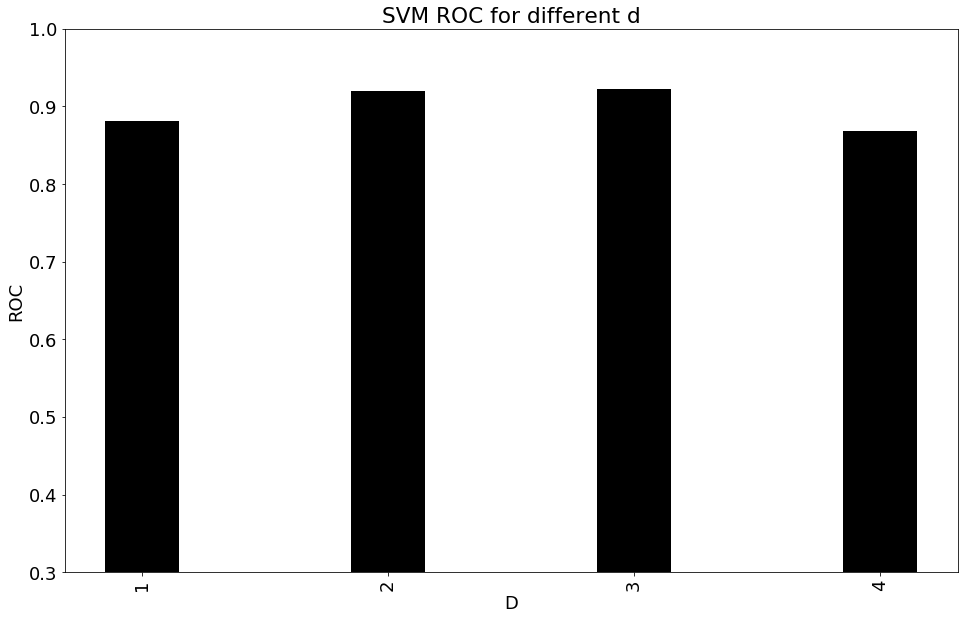

In [43]:
print("Roc Score for different values of d")
print(roc_auc_score_d)

def plot_test_accuracy(d_vals,roc_auc_score_d):
    plt.figure(figsize = (16,10)) 
    plt.bar(range(len(d_vals)), [roc_auc_score_d[d_val] for d_val in d_vals],width = 0.3,color='black',align='center')
                                 
    plt.title('SVM ROC for different d')
    plt.xlabel('D')
    plt.ylim(0.3, 1)
    plt.ylabel('ROC')
    plt.xticks(range(len(d_vals)), d_vals, rotation='vertical')
    plt.show()
    
plot_test_accuracy(d_vals,roc_auc_score_d)

In [44]:
import pickle
def save_model_result(dictionary):
    path = "/results/"
    f = open(path+"Q1_C_5.pkl","wb")
    pickle.dump(dictionary,f)
    f.close()

In [49]:
def load_model_result():
    path = "/results/"
    f = open(path+'Q1_C_7.pkl', 'rb')
    b =pickle.load(f)
    return b

## Part d
<p>(Results Evaluation) Plot the average number of support vectors obtained as a function
of d</p>

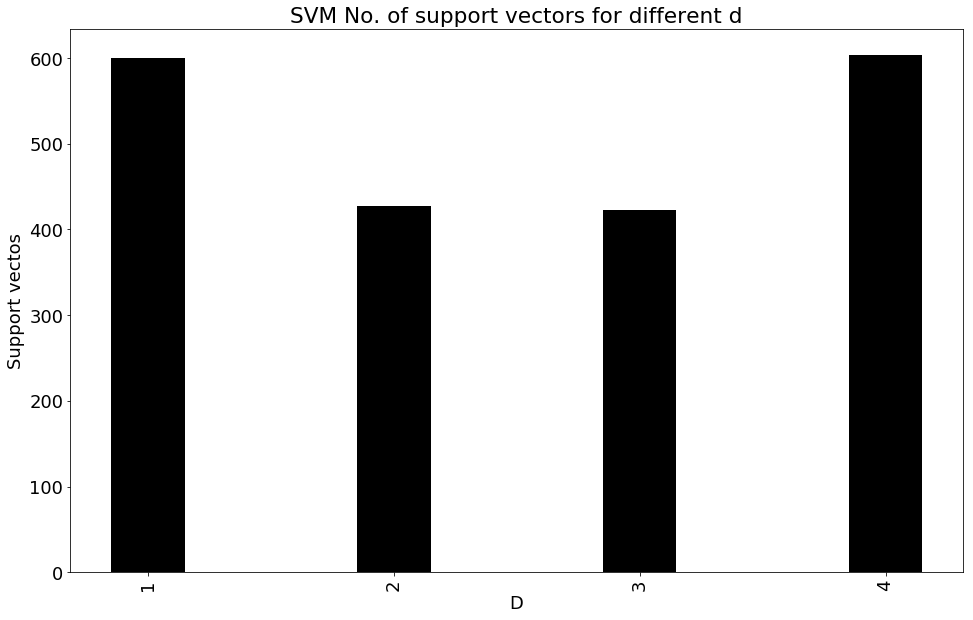

In [46]:

def plot_support_vectors(d_vals,support_vedctors_d):
    plt.figure(figsize = (16,10)) 
    plt.bar(range(len(d_vals)), [support_vedctors_d[d_val] for d_val in d_vals],width = 0.3,color='black',align='center')
                                 
    plt.title('SVM No. of support vectors for different d')
    plt.xlabel('D')
#     plt.ylim(0.3, 1)
    plt.ylabel('Support vectos')
    plt.xticks(range(len(d_vals)), d_vals, rotation='vertical')
    plt.show()
    
plot_support_vectors(d_vals,support_vedctors_d)

## Part e

<p>(Results Evaluation) How many of the support vectors lie on the margin hyperplanes?</p>

In [50]:
for i in range(1,len(dist)+1):
    count=0
    for j in dist[i]:
        if round(j,6)==1 or round(j,6)==-1:
            count+=1
    print("Number of Support Vectors on Margin for degree",i,"are :",count)

Number of Support Vectors on Margin for degree 1 are : 11
Number of Support Vectors on Margin for degree 2 are : 31
Number of Support Vectors on Margin for degree 3 are : 83
Number of Support Vectors on Margin for degree 4 are : 59


## Part f
<p>(Conceptual) Explain how the parameter d influences the model fit (margin size and #
number of support vectors).</p>


<b>Answer:</b>  The above histograms and values of accuracy show that increasing the d increases the accuracy till a certain value of d. After that, the model begins to overfit and the computation increases drastically because of which, we achieve the threshold in this data with d=3. 

## Part g

<p>(Conceptual) Assume you were using an RBF kernel instead of polynomial kernel, what
would the parameter γ influence in terms of the model fit (margin size and # number of
support vectors).</p>

<p><b>Answer:</b>   The gamma parameter in SVM tuning signifies the influence of points either near or far away from the hyperplane.
For a low gamma, the model will be too constrained and include all points of the training dataset, without really capturing the shape. Number of support vectors would increase and so would the margin size.

For a higher gamma, the model will capture the shape of the dataset well.The model would consider only the points close to the hyperplane for modeling. Number of support vectors would decrease and so would the margin size.</p>